In [1]:
import os
os.chdir("../")
os.getcwd()

'/home/honza/Documents/UniHack/fast-form'

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import json
import cv2
from preprocessing.preprocess import preprocess
from IPython.display import Image

import PIL.Image

from structure_parser.formstructureparser import FormStructureParser
from field_recognizer.recognize_all import recognize

from field_recognizer.model import load_model, load_result_mapper

Using TensorFlow backend.


In [14]:
from main import process_document, output_data
image_path = "test/example_forms/unihack/scan1.jpg"
with open("test/example_forms/unihack/config.json", 'r') as f:
    config = json.load(f) 

fsp = FormStructureParser(config)
model_structure_path = "model_data/model_letters.json"
model_weights_path = "model_data/model_letters.h5"
result_mapper_path = "model_data/model_letters_mapping.json"
# load model
model_letters = load_model(model_structure_path, model_weights_path)
# load result mapper
letter_mapper = load_result_mapper(result_mapper_path)

model_structure_path = "model_data/model_numbers.json"
model_weights_path = "model_data/model_numbers.h5"
result_mapper_path = "model_data/model_numbers_mapping.json"
# load model
model_numbers = load_model(model_structure_path, model_weights_path)
# load result mapper
number_mapper = load_result_mapper(result_mapper_path)

im = cv2.imread(image_path)

# process

# im = preprocess(im, config)
# form_data = fsp.process_form(im)
form_data = process_document(im, config, model_letters, model_numbers, letter_mapper, number_mapper)
filename = output_data(form_data, image_path)

Loaded model from disk
Loaded model from disk
[1333, 1272, 1271, 319, 2022, 1389, 371]
(1139.5714285714287, 1457.4, 81609.04000000001, 345.0, 676.0)
1333
1457.4
1272
1457.4
1271
1457.4
2022
1457.4
1389
1457.4


<IPython.core.display.Javascript object>


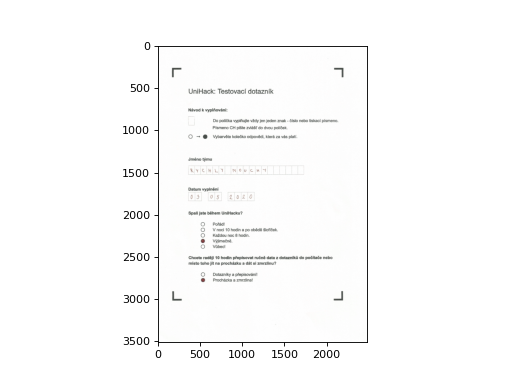

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# img=mpimg.imread(image_path)
imgplot = plt.imshow(im)
plt.show()

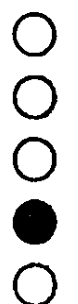

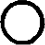

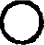

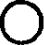

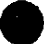

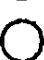

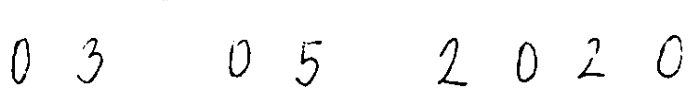

nothing


nothing


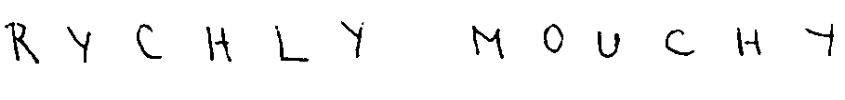

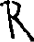

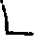

nothing


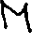

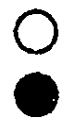

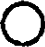

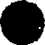

In [16]:
for field in form_data["fields"]:
    display(PIL.Image.fromarray(field["img"]))
    for img in field["box_data"]:
        if len(img)>0:
            display(PIL.Image.fromarray(img))
        else:
            print("nothing")

'False' with accuracy 0.9987837523768841
box_type:boxes


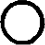

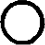

'False' with accuracy 0.9981873617147349
box_type:boxes


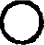

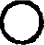

'False' with accuracy 0.998177584826161
box_type:boxes


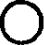

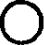

'True' with accuracy 1
box_type:boxes


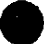

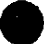

'False' with accuracy 1
box_type:boxes


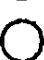

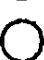

'0' with accuracy 0.9257382750511169
box_type:numbers


'3' with accuracy 0.9981811046600342
box_type:numbers


' ' with accuracy 1.0
box_type:numbers
nothing
'0' with accuracy 0.9998890161514282
box_type:numbers


'5' with accuracy 0.9999499320983887
box_type:numbers


' ' with accuracy 1.0
box_type:numbers
nothing
'2' with accuracy 0.9968783855438232
box_type:numbers


'0' with accuracy 0.9998928308486938
box_type:numbers


'2' with accuracy 0.9996163845062256
box_type:numbers


'0' with accuracy 0.9934211373329163
box_type:numbers


'R' with accuracy 0.9999899864196777
box_type:letters


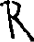

'Y' with accuracy 0.9995087385177612
box_type:letters


'C' with accuracy 0.9983338713645935
box_type:letters


'H' with accuracy 0.9998440742492676
box_type:letters


'L' with accuracy 0.9997808337211609
box_type:letters


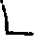

'Y' with accuracy 0.999921441078186
box_type:letters


' ' with accuracy 1.0
box_type:letters
nothing
'M' with accuracy 0.999956488609314
box_type:letters


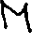

'O' with accuracy 0.8112698197364807
box_type:letters


'U' with accuracy 0.9844829440116882
box_type:letters


'C' with accuracy 0.9998226761817932
box_type:letters


'H' with accuracy 0.9996320009231567
box_type:letters


'Y' with accuracy 0.8811380863189697
box_type:letters


'False' with accuracy 0.9993312591648031
box_type:boxes


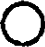

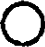

'True' with accuracy 0.969319696640591
box_type:boxes


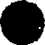

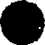

In [17]:
l=[]

for field in form_data["fields"]:
#     print(field)
    for img, val, acc, new_img in list(zip(field["box_data"],
                                   field["recognized"],
                                   field["accuracy"],
                                   field["box_data_transf"])):
        print(f"'{val}' with accuracy {acc}")
        print("box_type:{}".format(field["type"]))

        if len(img)>0:
            display(PIL.Image.fromarray(img))
            display(PIL.Image.fromarray(new_img))
            if field["type"] == "letters":
                l.append(new_img)
        else:
            print("nothing")